In [1]:
#importing the modules
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#reading the dataset
df = pd.read_csv("C:\\Users\\zeesh\\Desktop\\UniversityData\\Statistical-ML\\Project\\train.csv")

In [3]:
#step 3 : Viewing the data
df.head()

,Total words,Number words male,Number words female,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,6394,2631,1512,2251,343,2,1995,5,142,51.500000,42.333333,46,65,Female
1,8780,5236,1524,2020,1219,9,2001,4,37,39.125000,29.333333,58,34,Male
2,4176,3079,155,942,787,7,1968,1,376,42.500000,37.000000,46,37,Male
3,9855,5342,1073,3440,2623,12,2002,2,19,35.222222,21.500000,33,23,Male
4,7688,2536,1317,3835,3149,8,1988,4,40,45.250000,45.000000,36,39,Male


# <h2>Explanation of data <h2>

Year : That the film was released.<br> 
Number of female actors : With major speaking roles.<br> 
Number of male actors : With major speaking roles.<br> 
Gross : Profits made by film.<br> 
Total words : Total number of words spoken in the film.<br> 
Number of words male : Number of words spoken by all other male actors in the film (excluding lead if lead is male)<br> 
Number of words female : Number of words spoken by all other female actors in the film (excluding lead if lead is female)<br> 
Number of words lead : Number of words spoken by lead.<br> 
Difference in words lead and co-lead : Difference in number of words by lead and the actor of opposite gender who speaks most.<br> 
Lead Age : Age of lead actor.<br> 
Co-lead Age : Age of co-lead actor.<br> 
Mean Age Male : Mean age of all male characters.<br> 
Mean Age Female : Mean age of all female characters.<br> 

# Data Analysis

### Visually Analysisng the data using Seaborn
#### Check how many MALE and Female are there using countplot method

<AxesSubplot:xlabel='Lead', ylabel='count'>

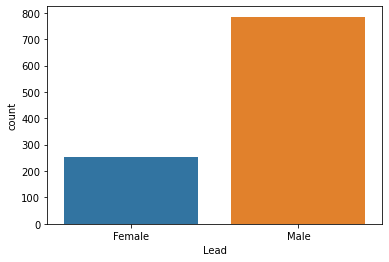

In [4]:
sns.countplot(x='Lead', data = df)

#### Checking for null values in the dataset

In [5]:
df.isna().sum()

Total words                             0
Number words male                       0
Number words female                     0
Number of words lead                    0
Difference in words lead and co-lead    0
Number of male actors                   0
Year                                    0
Number of female actors                 0
Gross                                   0
Mean Age Male                           0
Mean Age Female                         0
Age Lead                                0
Age Co-Lead                             0
Lead                                    0
dtype: int64

##### Visualizing the null values in the dataset

<AxesSubplot:>

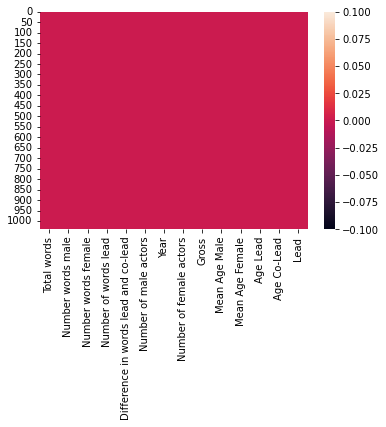

In [6]:
sns.heatmap(df.isnull())

In [7]:
 #data of age of leads where Lead is Male
df_Male = df.where(df['Lead'] == 'Male')
df_M=df_Male.dropna(how='all')

#data of age of leads where Lead is Female
df_Female = df.where(df['Lead'] == 'Female')
df_F=df_Female.dropna(how='all')

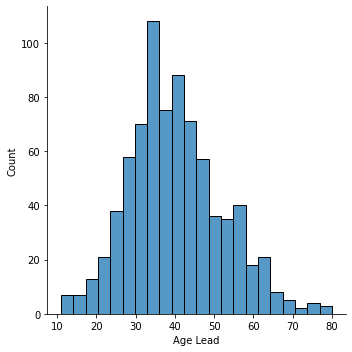

In [8]:
#find the distribution of age where Lead is Male
sns.displot(x='Age Lead', data= df_M)

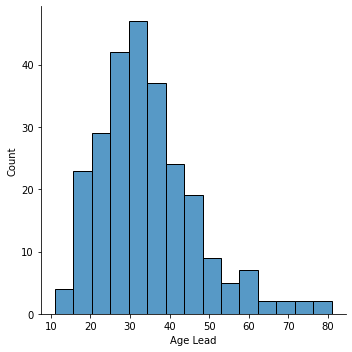

In [9]:
#find the distribution of age where Lead is Female
sns.displot(x='Age Lead', data= df_F)

# Preparing data for model

In [10]:
#Convert Lead gender coloumn to Numerical values
pd.get_dummies(df['Lead'])

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1034,0,1
1035,1,0
1036,0,1
1037,1,0


In [11]:
Gender_B = pd.get_dummies(df['Lead'], drop_first=True)

In [12]:
df['Gender_B'] = Gender_B

In [13]:
df.head()

,Total words,Number words male,Number words female,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead,Gender_B
0,6394,2631,1512,2251,343,2,1995,5,142,51.500000,42.333333,46,65,Female,0
1,8780,5236,1524,2020,1219,9,2001,4,37,39.125000,29.333333,58,34,Male,1
2,4176,3079,155,942,787,7,1968,1,376,42.500000,37.000000,46,37,Male,1
3,9855,5342,1073,3440,2623,12,2002,2,19,35.222222,21.500000,33,23,Male,1
4,7688,2536,1317,3835,3149,8,1988,4,40,45.250000,45.000000,36,39,Male,1


In [14]:
# drop column which are not required for the model
df.drop(['Year','Gross','Age Co-Lead'],axis=1,inplace=True)

In [15]:
df.head()

,Total words,Number words male,Number words female,Number of words lead,Difference in words lead and co-lead,Number of male actors,Number of female actors,Mean Age Male,Mean Age Female,Age Lead,Lead,Gender_B
0,6394,2631,1512,2251,343,2,5,51.500000,42.333333,46,Female,0
1,8780,5236,1524,2020,1219,9,4,39.125000,29.333333,58,Male,1
2,4176,3079,155,942,787,7,1,42.500000,37.000000,46,Male,1
3,9855,5342,1073,3440,2623,12,2,35.222222,21.500000,33,Male,1
4,7688,2536,1317,3835,3149,8,4,45.250000,45.000000,36,Male,1


In [16]:
#Seperate dependent and dependent variable 
#dependent variable
x = df[['Total words','Number words male','Number words female','Number of words lead','Difference in words lead and co-lead','Number of male actors','Number of female actors','Mean Age Male','Mean Age Female','Age Lead']]
#dependent variable
y = df['Gender_B']

In [17]:
y

0       0
1       1
2       1
3       1
4       1
       ..
1034    1
1035    0
1036    1
1037    0
1038    1
Name: Gender_B, Length: 1039, dtype: uint8

# Data Modeling

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#train test split
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.33, random_state=5)

In [20]:
#import Random Forest
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators = 100)
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
#check accuracy
print(f'Train Accuracy = {rf_clf.score(x_train, y_train):.3f}')
print(f'Test Accuracy = {rf_clf.score(x_test, y_test):.3f}')

Train Accuracy = 1.000
Test Accuracy = 0.808


In [22]:
#Predict Probabiltiy
rf_prob = rf_clf.predict_proba(x_test)

In [23]:
#Probabiltiy for +tive outcome is kept
rf_prob = rf_clf.predict_proba(x_test)[:,1]

In [24]:
# Complete AREA UNDER THE ROC CURVE values
from sklearn.metrics import roc_curve, roc_auc_score
rf_auc = roc_auc_score(y_test, rf_prob)


In [25]:
#Display the AREA UNDER THE ROC CURVE score
print("Random forest : AUROC = %.3f" %(rf_auc))

Random forest : AUROC = 0.864


In [26]:
#Calculate AREA UNDER THE ROC CURVE score
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)

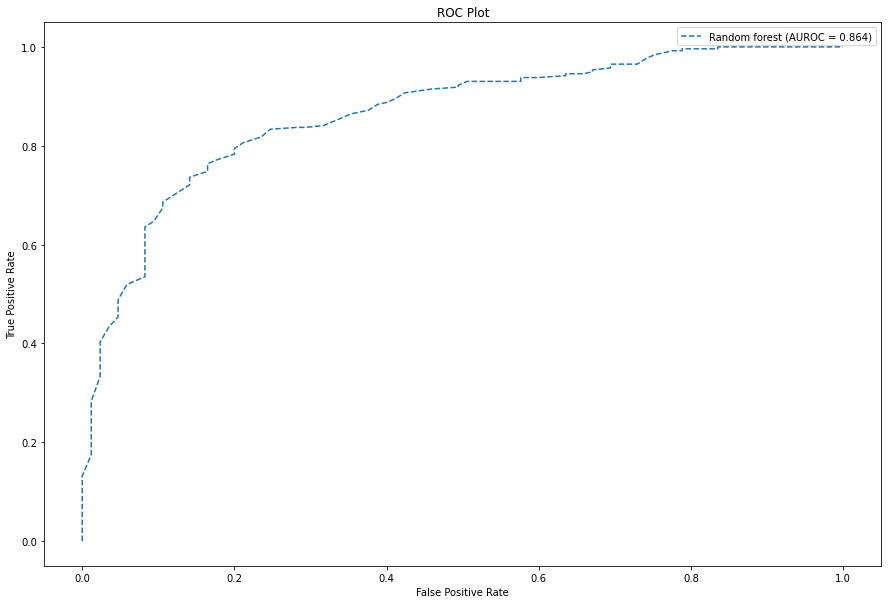

In [27]:
#plot the curve
plt.figure(figsize = (15,10))
plt.plot(rf_fpr, rf_tpr, linestyle = '--', label = 'Random forest (AUROC = %0.3f)' %rf_auc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

### Tunning the method using hyperparameter 

In [28]:
# Number of trees in random forest
n_estimators,  = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [29]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [30]:
rf_Model = ensemble.RandomForestClassifier()

In [31]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid , cv = 3, verbose = 2, n_jobs = 4)

In [32]:
rf_Grid.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [33]:
rf_Grid.best_params_

#check accuracy
print(f'Train Accuracy = {rf_Grid.score(x_train, y_train):.3f}')
print(f'Test Accuracy = {rf_Grid.score(x_test, y_test):.3f}')

Train Accuracy = 0.848
Test Accuracy = 0.790


# K Fold Cross Validation

In [50]:
from sklearn.model_selection import KFold
model = ensemble.RandomForestClassifier()
kfold_validation = KFold(10)

In [51]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(model, x, y, cv = kfold_validation)
print(result)
print(np.mean(result))

[0.89423077 0.92307692 0.84615385 0.84615385 0.86538462 0.84615385
 0.84615385 0.79807692 0.82692308 0.84466019]
0.8536967886482449


## Repeated Random Test-Train Splits

In [52]:
from sklearn.model_selection import ShuffleSplit
model = ensemble.RandomForestClassifier()
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.30)
results = cross_val_score(model, x, y, cv=ssplit)

In [53]:
#results
print(f'Results = {results}')

Results = [0.79807692 0.83333333 0.86217949 0.83653846 0.875      0.84294872
 0.82051282 0.84935897 0.81730769 0.81730769]


In [54]:
#np.mean(results)
print(f'Mean Result = {np.mean(results):.5f}')

Mean Result = 0.83526
